# Shifted SABR Model for Interest Rates

We examine the Shifted SABR model

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
from financepy.utils import *
from financepy.models.FinModelSABRShifted import *

## Shifted SABR Model

I examine the volatility as a function of strike

In [80]:
strikes = np.linspace(0.01, 0.10, 100)

In [81]:
f = 0.032

In [82]:
texp = 2.0

In [104]:
alpha = 0.174; beta = 1.0; rho = -0.90; nu = 0.817; shift = 0.10

In [105]:
model = FinModelSABRShifted(alpha, beta, rho, nu, shift)

In [106]:
model

OBJECT TYPE: FinModelSABRShifted
Alpha: 0.174
Beta: 1.0
Nu: 0.817
Rho: -0.9
Shift: 0.1

In [107]:
volsSABR = model.black_vol(f, strikes, texp) * 100

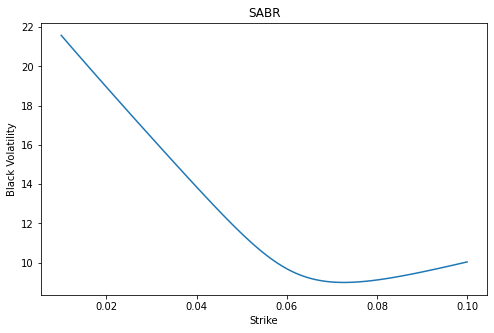

In [108]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility");

## Calibration - Fitting to the ATM Vol

In [109]:
blackVol = 0.22

In [110]:
f = 0.032

In [111]:
k = f

In [112]:
model.setAlphaFromATMBlackVol(blackVol, k, texp)

In [113]:
model

OBJECT TYPE: FinModelSABRShifted
Alpha: 0.2486852107791646
Beta: 1.0
Nu: 0.817
Rho: -0.9
Shift: 0.1

In [114]:
model.black_vol(f, k, texp) * 100

22.000000000000004

The SABR model now fits the ATM volatility exactly

In [115]:
volsSABR = model.black_vol(f, strikes, texp) * 100

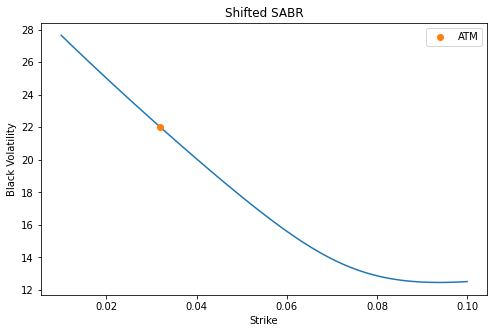

In [116]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("Shifted SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend();

## Calibration - Fitting to the Any Strike Vol

In [117]:
blackVol = 0.26

In [118]:
f = 0.032

In [119]:
k = 0.040

In [120]:
model.setAlphaFromBlackVol(blackVol, f, k, texp)

In [121]:
model

OBJECT TYPE: FinModelSABRShifted
Alpha: 0.32546648295601316
Beta: 1.0
Nu: 0.817
Rho: -0.9
Shift: 0.1

In [122]:
volsSABR = model.black_vol(f, strikes, texp) * 100

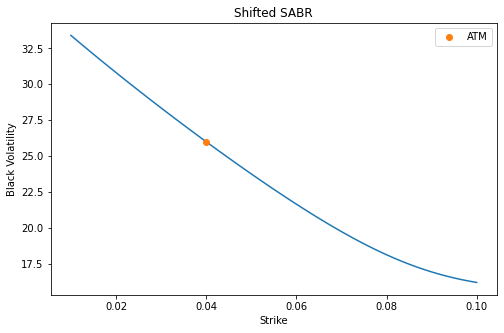

In [124]:
plt.figure(figsize=(8,5))
plt.plot(strikes, volsSABR)
plt.title("Shifted SABR")
plt.xlabel("Strike")
plt.ylabel("Black Volatility")
plt.plot(k, blackVol*100, 'o', label="ATM")
plt.legend();

Copyright (c) 2020 Dominic O'Kane